In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
path = ""

In [ ]:
ann_data = pd.read_csv("Churn_Modelling.csv")
ann_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ann_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
ann_data['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [ ]:
ann_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


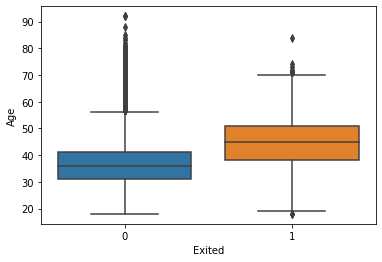

In [ ]:
sns.boxplot(x="Exited", y="Age", data=ann_data) 

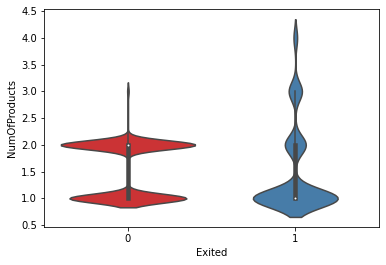

In [ ]:
sns.violinplot(x="Exited",y="NumOfProducts",data=ann_data,palette="Set1")

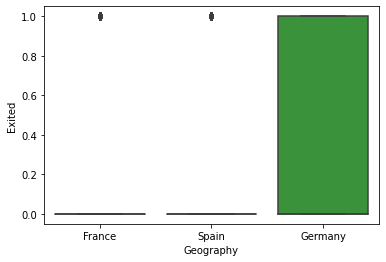

In [ ]:
sns.boxplot(x="Geography", y="Exited", data=ann_data)

In [ ]:
ann1 = pd.get_dummies(ann_data)

In [ ]:
X = ann1.iloc[:, 3:13].values
y = ann1.iloc[:, 13].values
X, y

(array([[4.2000000e+01, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [4.1000000e+01, 1.0000000e+00, 8.3807860e+04, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [4.2000000e+01, 8.0000000e+00, 1.5966080e+05, ..., 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [3.6000000e+01, 7.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [4.2000000e+01, 3.0000000e+00, 7.5075310e+04, ..., 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [2.8000000e+01, 4.0000000e+00, 1.3014279e+05, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))


In [ ]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 200)

Epoch 1/200
800/800 [==============================] - 2s 2ms/step - loss: 0.3981 - accuracy: 0.9995
Epoch 2/200
800/800 [==============================] - 1s 2ms/step - loss: 0.1444 - accuracy: 0.9995
Epoch 3/200
800/800 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9995
Epoch 4/200
800/800 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9995
Epoch 5/200
800/800 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9995
Epoch 6/200
800/800 [==============================] - 1s 2ms/step - loss: 0.0170 - accuracy: 0.9995
Epoch 7/200
800/800 [==============================] - 1s 2ms/step - loss: 0.0121 - accuracy: 0.9995
Epoch 8/200
800/800 [==============================] - 1s 2ms/step - loss: 0.0091 - accuracy: 0.9995
Epoch 9/200
800/800 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9995
Epoch 10/200
800/800 [==============================] - 1s 2ms/step - loss: 0.0061 - accura

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)